# Install packages

In [ ]:
from google.colab import drive # import drive from google colab
drive.mount("/content/drive") 
!pip install neo
!pip install matplotlib_scalebar
!pip install ffmpeg
!pip install Ipython --upgrade
!pip3 install setuptools==65.5.0
%load_ext autoreload
%autoreload 2

# Retrieve individual monkey data

In [ ]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0321"
data_item = further_processing_class.FurtherProcessing(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
data_item.find_patterns()
# data_item.make_or_retrieve_all_trial_patterns(exists_ok=True)
# data_item.make_or_retrieve_pattern_frequencies(exists_ok=True)
# data_item.make_or_retrieve_all_trial_features(exists_ok=True)
# data_item.make_or_retrieve_feature_statistics(exists_ok=True)
# data_item.make_info_of_monkey()
# data_item.make_or_retrieve_target_closest()
# data_item.make_or_retrieve_target_angle_smallest()
# data_item.make_distance_dataframe()
# data_item.make_angle_dataframe()

# monkey_information = data_item.monkey_information
# target_closest = data_item.target_closest
# target_angle_smallest = data_item.target_angle_smallest
# ff_dataframe = data_item.ff_dataframe

# ff_life_sorted = data_item.ff_life_sorted
# ff_real_position_sorted = data_item.ff_real_position_sorted
# ff_believed_position_sorted = data_item.ff_believed_position_sorted
# cluster_around_target_indices = data_item.cluster_around_target_indices
# ff_caught_T_new = data_item.ff_caught_T_new
# ff_flash_sorted = data_item.ff_flash_sorted

# all_trial_patterns = data_item.all_trial_patterns
# all_trial_features = data_item.all_trial_features
# pattern_frequencies = data_item.pattern_frequencies
# feature_statistics = data_item.feature_statistics
# info_of_monkey = data_item.info_of_monkey
# distance_dataframe = data_item.distance_dataframe
# angle_dataframe = data_item.angle_dataframe
# trial_vs_distance = data_item.trial_vs_distance
# trial_vs_angle = data_item.trial_vs_angle

Retrieved monkey data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Schro/data_0321/monkey_information.csv  and ff data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Schro/data_0321/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from  all_monkey_data/processed_data/individual_monkey_data/monkey_Schro/data_0321/ff_dataframe.h5
When take out monkey subset for GUAT, 56 clusters out of 78 are too close to the target or the last target. Those clusters are filtered out.
The number of new trials that are used to separate stop clusters is 393


# New denominators for pattern frequency

## GUAT/TAFT 

In [ ]:
gc_kwargs = GUAT_vs_TAFT_class.gc_kwargs
gcc = GUAT_collect_info_class.GUATCollectInfoForSession(raw_data_folder_path=raw_data_folder_path, 
                                                        gc_kwargs=gc_kwargs, 
                                                        new_point_index_start=0)
gcc.get_monkey_data(already_retrieved_ok=True, include_TAFT_data=True)
gcc.make_one_stop_w_ff_df()

Denominator being sum of one stop instances (near visible/in memory ff but w/o capturing ff) + GUAT + TAFT

In [ ]:
# can calculate GUAT/one stop, TAFT/one stop, (GUAT + TAFT)/one stop, GUAT/TAFT, TAFT/(GUAT + TAFT), etc
n_GUAT = len(gcc.GUAT_w_ff_df)
n_one = len(gcc.one_stop_w_ff_df)
n_TAFT = len(gcc.data_item.TAFT_trials_df)
n_total = n_GUAT + n_TAFT + n_one

print(f'n_GUAT/n_total: {n_GUAT/n_total}')
print(f'n_TAFT/n_total: {n_TAFT/n_total}')
print(f'n_one/n_total: {n_one/n_total}')
print(f'(n_GUAT + n_TAFT)/n_total: {(n_GUAT + n_TAFT)/n_total}')
print(f'n_GUAT/n_TAFT: {n_GUAT/n_TAFT}')
print(f'n_TAFT/(n_GUAT + n_TAFT): {n_TAFT/(n_GUAT + n_TAFT)}')

n_GUAT/n_total: 0.3238993710691824
n_TAFT/n_total: 0.4811320754716981
n_one/n_total: 0.1949685534591195
(n_GUAT + n_TAFT)/n_total: 0.8050314465408805
n_GUAT/n_TAFT: 0.673202614379085
n_TAFT/(n_GUAT + n_TAFT): 0.59765625


## Ignore sudden flash

In [ ]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0314"
data_item = further_processing_class.FurtherProcessing(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
data_item.find_patterns()

Retrieved monkey data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/monkey_information.csv  and ff data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/ff_dataframe.h5
When take out monkey subset for GUAT, 412 clusters out of 549 are too close to the target or the last target. Those clusters are filtered out.
The number of new trials that are used to separate stop clusters is 953


In [ ]:
sudden_flash_sub = pattern_by_trials.find_instances_of_sudden_flash_ff(data_item.ff_dataframe, max_ff_distance_from_monkey=50)

In [ ]:
ignore_sudden_flash_ratio = (data_item.ignore_sudden_flash_trials.shape[0])/(sudden_flash_sub['target_index'].unique().shape[0])
ignore_sudden_flash_ratio

0.3795918367346939

## waste target around last target

In [ ]:
# denominator should be num trials with cluster around target

In [ ]:
data_item.find_patterns()

When take out monkey subset for GUAT, 412 clusters out of 549 are too close to the target or the last target. Those clusters are filtered out.
The number of new trials that are used to separate stop clusters is 953


In [ ]:
data_item.used_cluster_trials.shape[0] / data_item.cluster_around_target_trials.shape[0]

0.45569620253164556

# Target closest & target_angle_smallest

In [ ]:
# plot_statistics.plot_proportion_of_target_closest(target_closest)

In [ ]:
# plot_statistics.plot_proportion_of_target_closest(target_closest)
# plot_statistics.plot_proportion_of_target_angle_smallest(target_angle_smallest)

# Are angles to fireflies decreasing?

## plot trials

In [ ]:
trial_total_num = 10
data_item.cluster_around_target_trials, _, data_item.cluster_around_target_indices, data_item.cluster_around_target_positions = pattern_by_trials.cluster_around_target_func(data_item.ff_dataframe, 
        data_item.caught_ff_num, data_item.ff_caught_T_new, data_item.ff_real_position_sorted)

classic_plot_kwargs = {'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True}
data_item.PlotTrials_args = (data_item.monkey_information, data_item.ff_dataframe, data_item.ff_life_sorted, data_item.ff_real_position_sorted, data_item.ff_believed_position_sorted, data_item.cluster_around_target_indices, data_item.ff_caught_T_new)

currentTrial: 102 num_trials: 2


<Figure size 1000x1000 with 0 Axes>

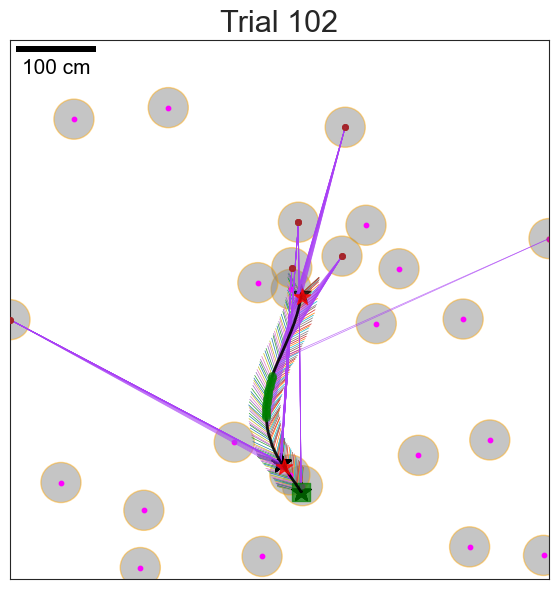

In [ ]:

num_trials = 2 


with basic_func.initiate_plot(10,10,100):
  for currentTrial in [102]: #two_in_a_row[10:20]:
      duration = [data_item.ff_caught_T_new[currentTrial-num_trials], data_item.ff_caught_T_new[currentTrial]]
      plot_trials.PlotTrials(duration, 
                  *data_item.PlotTrials_args,
                  **classic_plot_kwargs,
                  currentTrial = currentTrial,
                  num_trials = num_trials,                   
                  show_connect_path_ff_except_targets = True,
                  show_path_when_target_visible = True,
                  show_ff_indices = False,
                  hitting_arena_edge_ok = True,
                  visible_distance = 400,
                  minimal_margin = 300,
                  show_monkey_angles = True
                  )
      plt.show()  

      

## Plot: abs_ffangle_decreasing (angle or angle to boundary?)

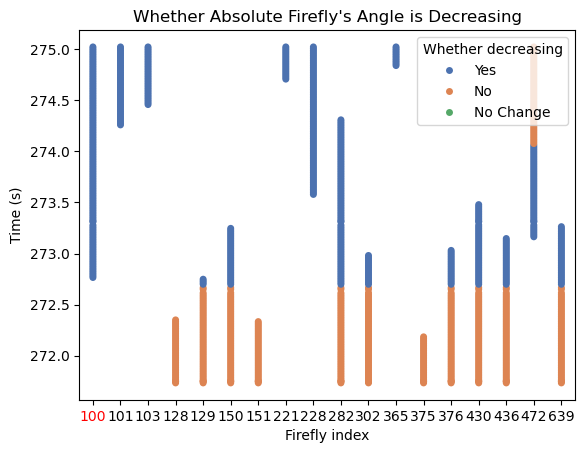

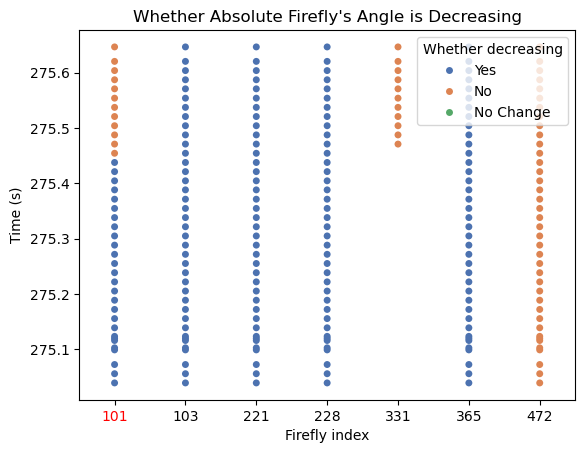

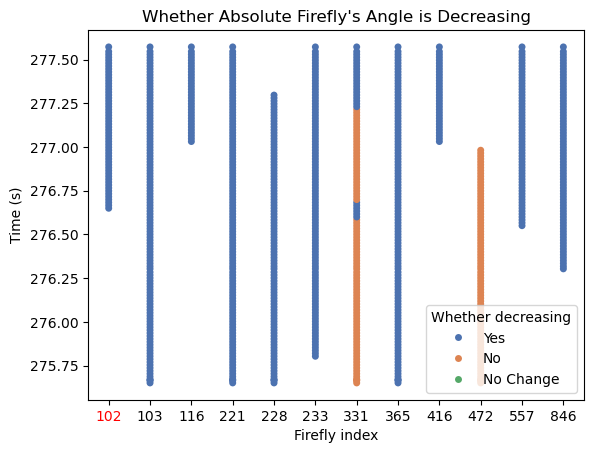

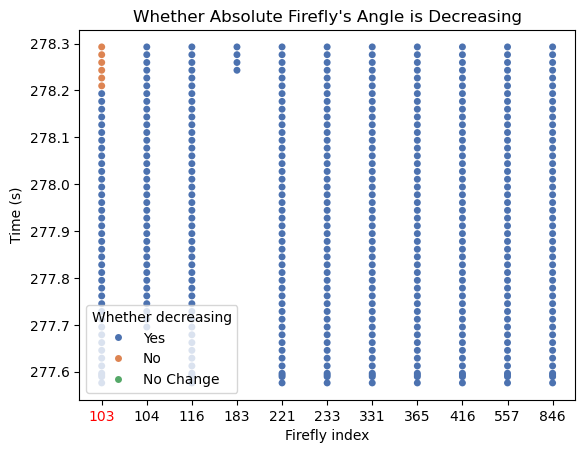

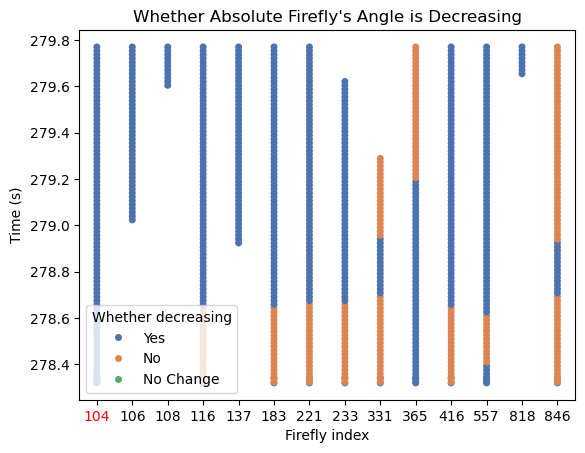

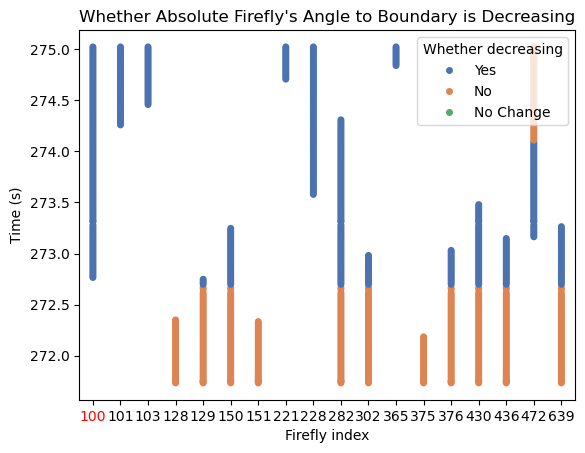

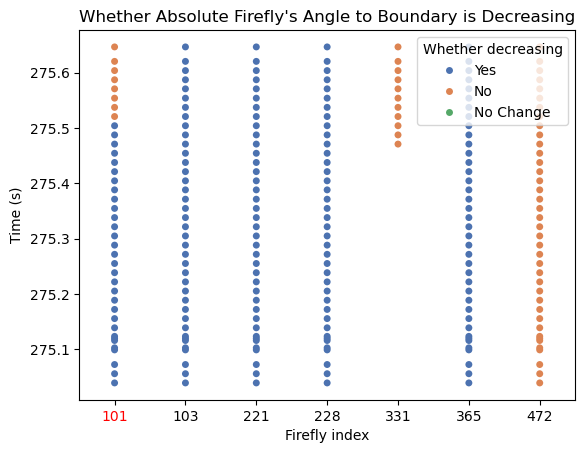

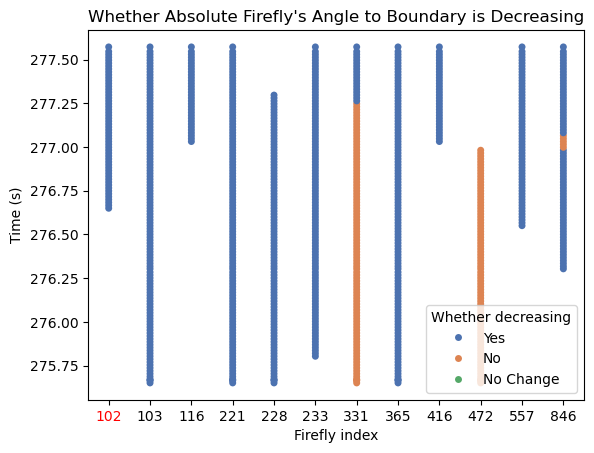

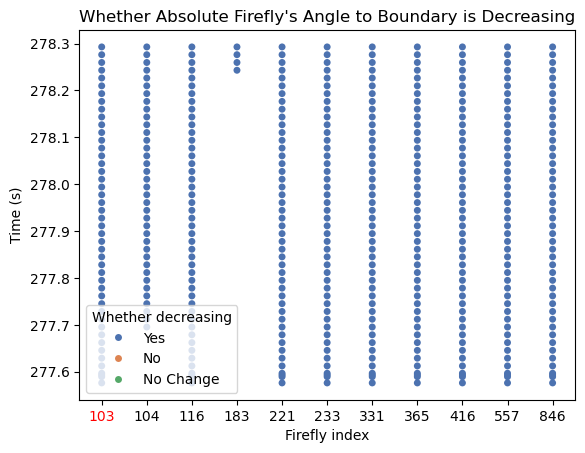

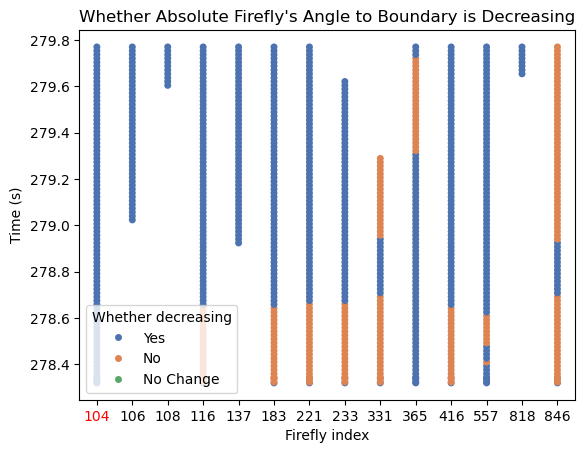

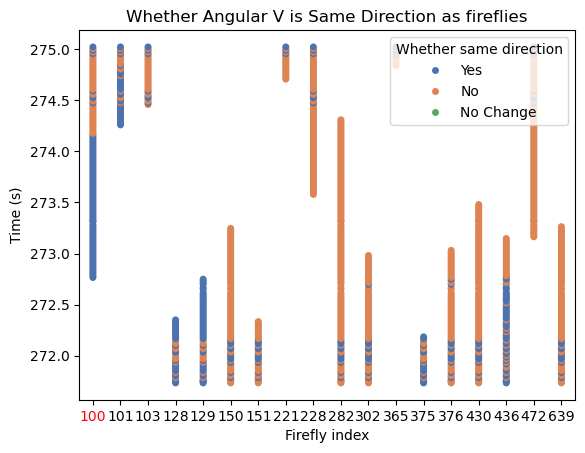

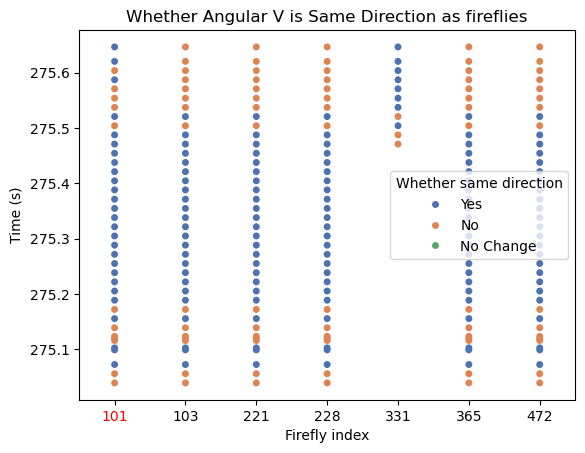

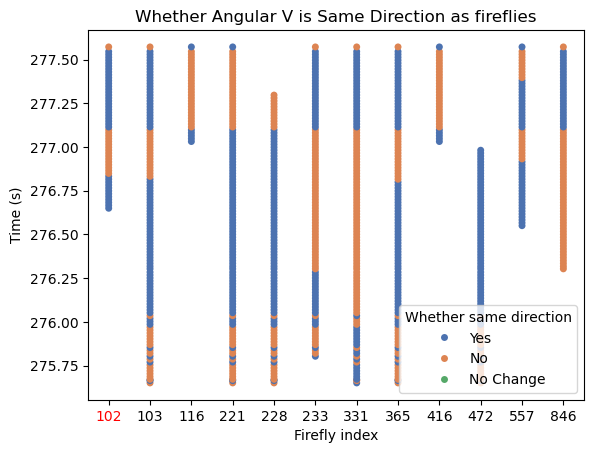

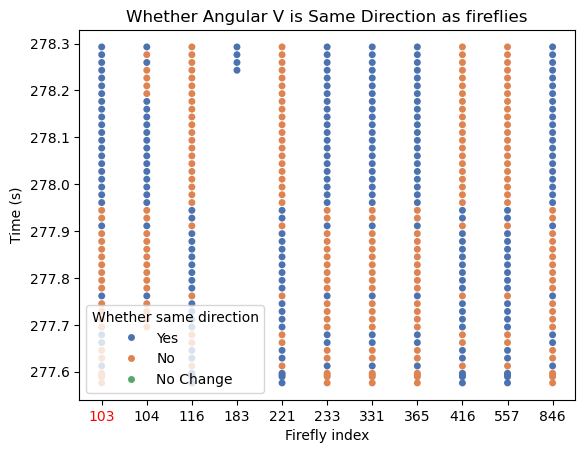

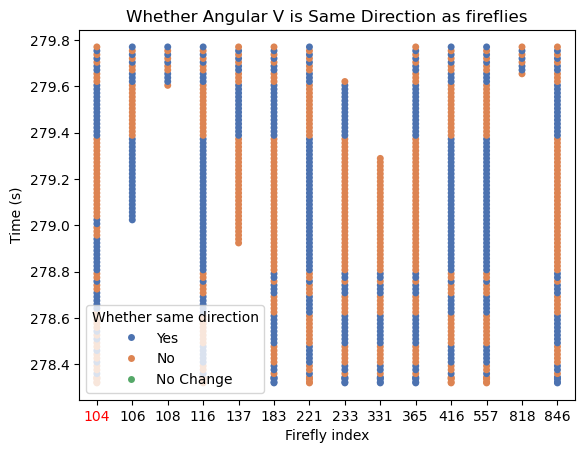

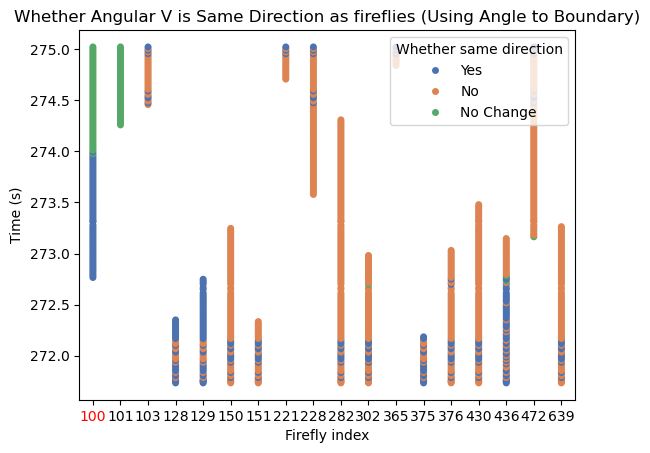

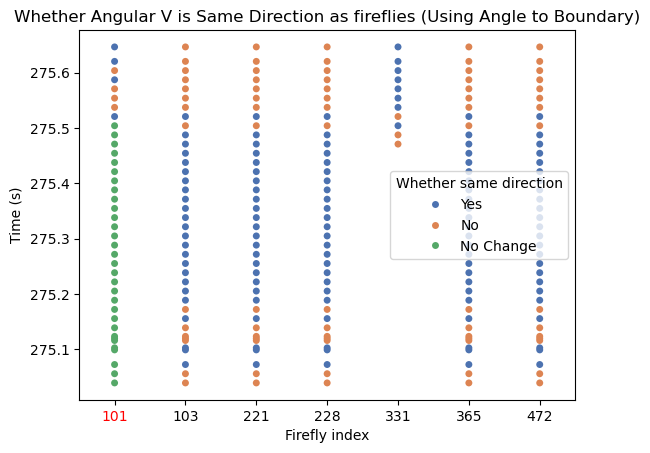

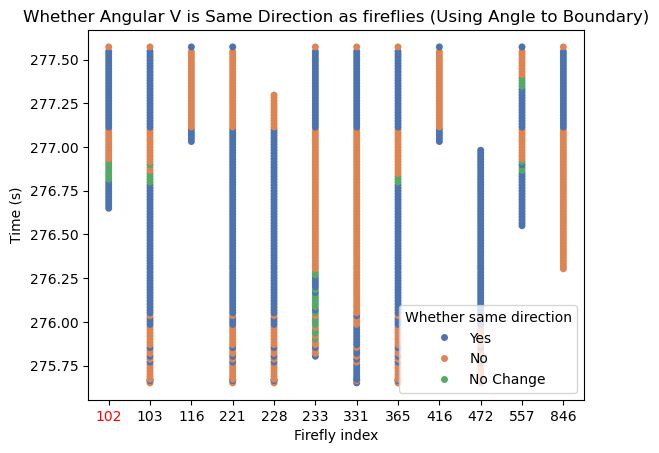

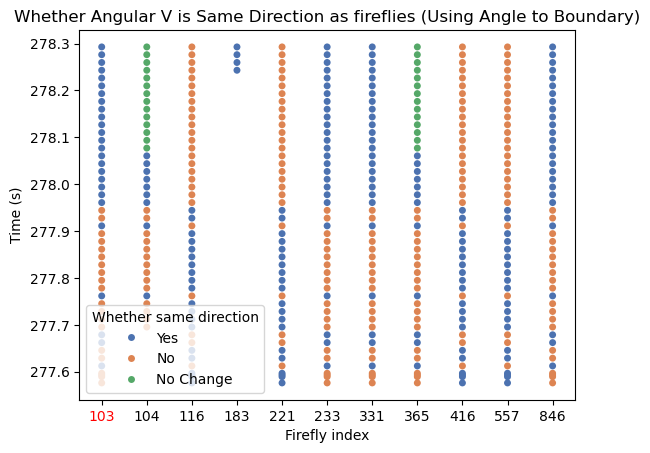

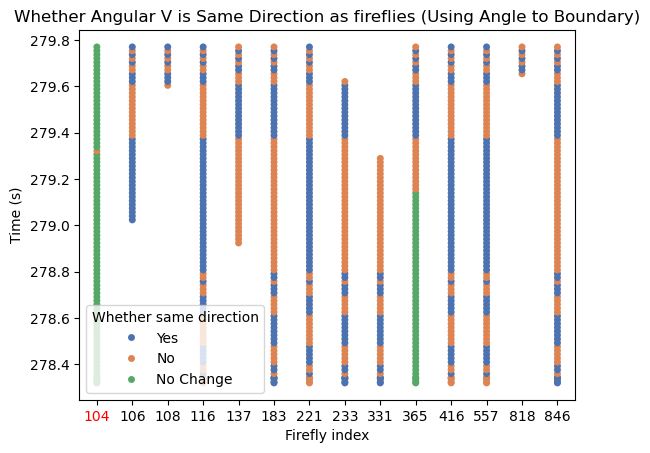

In [ ]:
trial_numbers = range(100, 105)
plot_behaviors_utils.plot_change_in_ff_angle(data_item.ff_dataframe, trial_numbers, var_of_interest = "abs_ffangle_decreasing")
plot_behaviors_utils.plot_change_in_ff_angle(data_item.ff_dataframe, trial_numbers, var_of_interest = "abs_ffangle_boundary_decreasing")
plot_behaviors_utils.plot_change_in_ff_angle(data_item.ff_dataframe, trial_numbers, var_of_interest = "dw_same_sign_as_ffangle")
plot_behaviors_utils.plot_change_in_ff_angle(data_item.ff_dataframe, trial_numbers, var_of_interest = "dw_same_sign_as_ffangle_boundary")

# New two in a row

## New two-in-a-row (no speed up in the middle)

**If two fireflies were caught in the same chunk**

In [ ]:
from data_wrangling import more_data_wrangling_func
chunk_numbers, new_chunk_indices = more_data_wrangling_func.reorganize_data_into_chunks(data_item.monkey_information)

In [ ]:
new_chunk_start_times = data_item.monkey_information['monkey_t'][new_chunk_indices].values
ff_caught_T_chunk_numbers = np.digitize(data_item.ff_caught_T_new, new_chunk_start_times)
# find the trials where at least two fireflies were caught during the same chunk
two_in_a_row_trials_by_chunk = np.where(np.diff(ff_caught_T_chunk_numbers)==0)[0]+1

[77.51662, 79.641389]
currentTrial: 19 num_trials: 2


<Figure size 700x700 with 0 Axes>

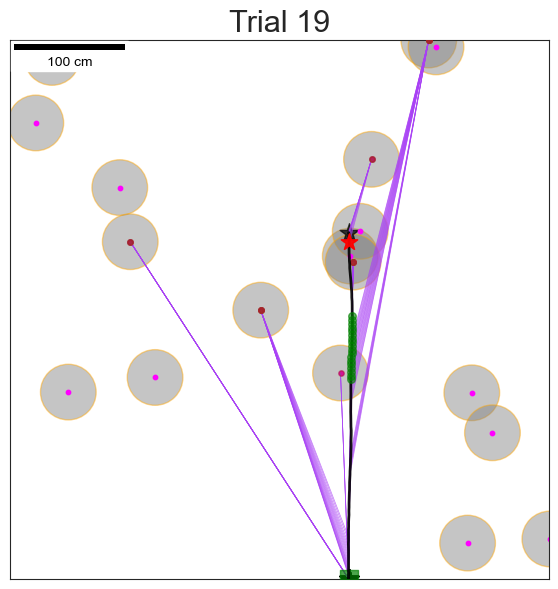

[79.641389, 79.641389]
currentTrial: 20 num_trials: 2


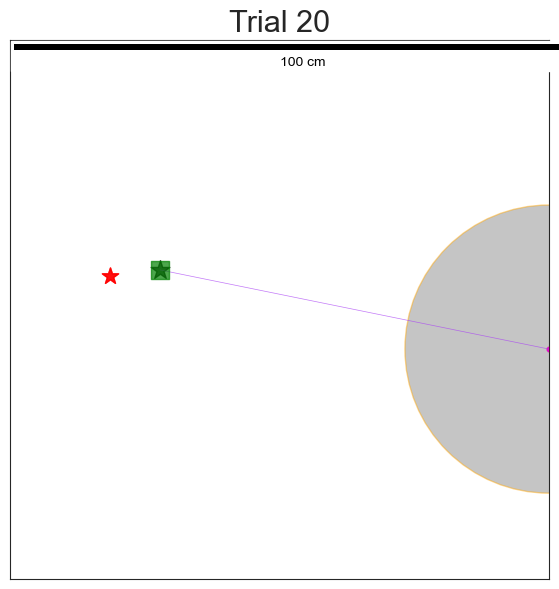

[80.504786, 81.994739]
currentTrial: 23 num_trials: 2


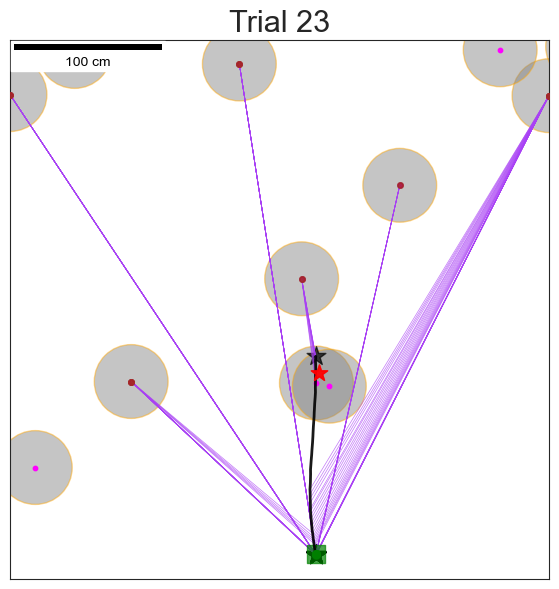

[96.68559, 97.963738]
currentTrial: 32 num_trials: 2


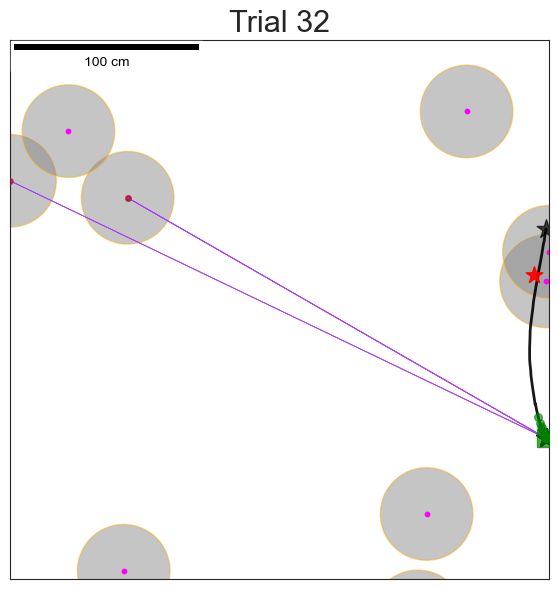

[151.700899, 154.571956]
currentTrial: 51 num_trials: 2


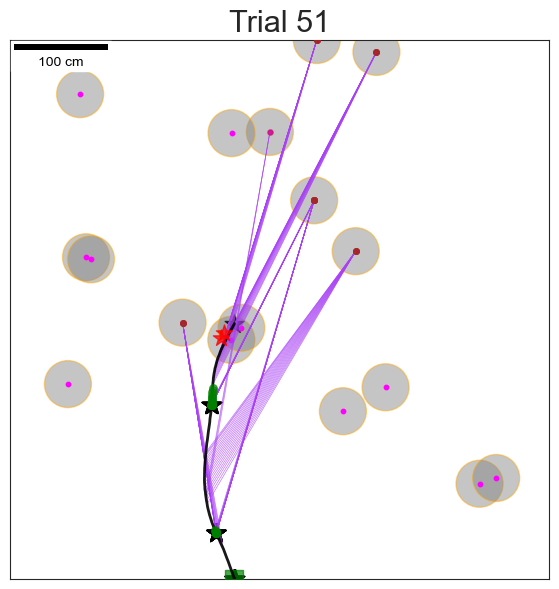

In [ ]:
category = two_in_a_row_trials_by_chunk
trial_total_num = 5
PlotTrials_args = (data_item.monkey_information, data_item.ff_dataframe, data_item.ff_life_sorted, data_item.ff_real_position_sorted, 
                   data_item.ff_believed_position_sorted, data_item.cluster_around_target_indices, data_item.ff_caught_T_new)
PlotTrials_kwargs = {'player': 'monkey',
                     'images_dir': None} 

classic_plot_kwargs = {'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True}

#category = two_in_a_row_simuly
#category = two_in_a_row_non_simul
#category = used_cluster  --> two_in_a_row_non_simul ^ on_before_last_one

num_trials = 2 

if len(category) > 0:
  with basic_func.initiate_plot(7,7,100):
    for currentTrial in category[:trial_total_num]:
        duration = [data_item.ff_caught_T_new[currentTrial-num_trials], 
                    data_item.ff_caught_T_new[currentTrial]]
        print(duration)
        plot_trials.PlotTrials(duration, 
                   *PlotTrials_args,
                   **classic_plot_kwargs,
                   currentTrial = currentTrial,
                   num_trials = num_trials,                   
                   show_connect_path_ff_except_targets = True,
                   show_path_when_target_visible = True,
                   )
        plt.show()  
        

## New two-in-a-row (no stop in the middle)


In [ ]:
# import LA
from numpy import linalg as LA


In [ ]:
monkey_information = data_item.monkey_information.copy()
monkey_information['trials'] = np.digitize(monkey_information['monkey_t'], data_item.ff_caught_T_new)
all_trials = monkey_information.trials.unique()
# take out all the rows where the monkey stops
speed_threshold = 5
monkey_info_subset = monkey_information[monkey_information['monkey_speed'] < speed_threshold].copy()

# if a stop is within 25 cm of the previous or the current target, then it doesn't count
monkey_info_subset['target_x'] = data_item.ff_real_position_sorted[monkey_info_subset['trials']][:,0]
monkey_info_subset['target_y'] = data_item.ff_real_position_sorted[monkey_info_subset['trials']][:,1]
monkey_info_subset['prev_target_x'] = data_item.ff_real_position_sorted[monkey_info_subset['trials']-1][:,0]
monkey_info_subset['prev_target_y'] = data_item.ff_real_position_sorted[monkey_info_subset['trials']-1][:,1]
monkey_info_subset['distance_to_target'] = LA.norm(monkey_info_subset[['monkey_x', 'monkey_y']].values - monkey_info_subset[['target_x', 'target_y']].values, axis=1)
monkey_info_subset['distance_to_prev_target'] = LA.norm(monkey_info_subset[['monkey_x', 'monkey_y']].values - monkey_info_subset[['prev_target_x', 'prev_target_y']].values, axis=1)
monkey_info_subset2 = monkey_info_subset[(monkey_info_subset['distance_to_target'] > 25) &
                                         (monkey_info_subset['distance_to_prev_target'] > 25)]
trials_containing_stops_in_middle = monkey_info_subset2.trials.unique()
two_in_a_row_trials_by_stops = np.setdiff1d(all_trials, trials_containing_stops_in_middle)                                         

[37.149112, 43.158183]
currentTrial: 4 num_trials: 2


<Figure size 700x700 with 0 Axes>

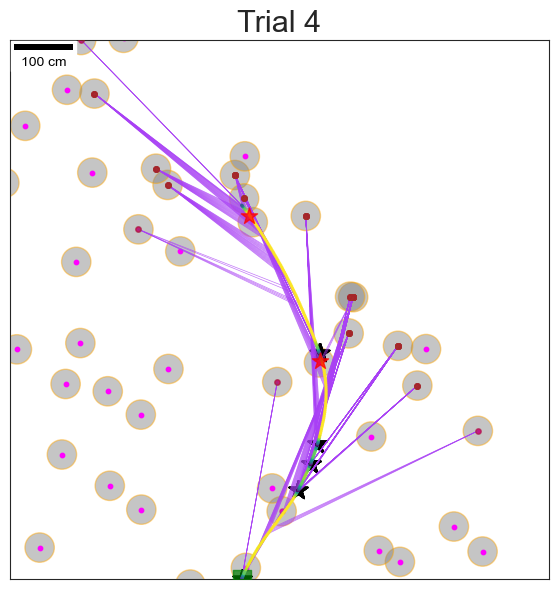

[44.811357, 48.765749]
currentTrial: 7 num_trials: 2


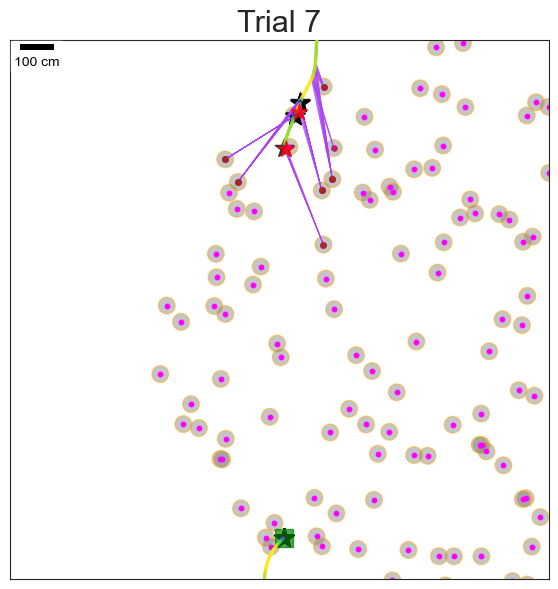

[52.537038, 54.821044]
currentTrial: 10 num_trials: 2


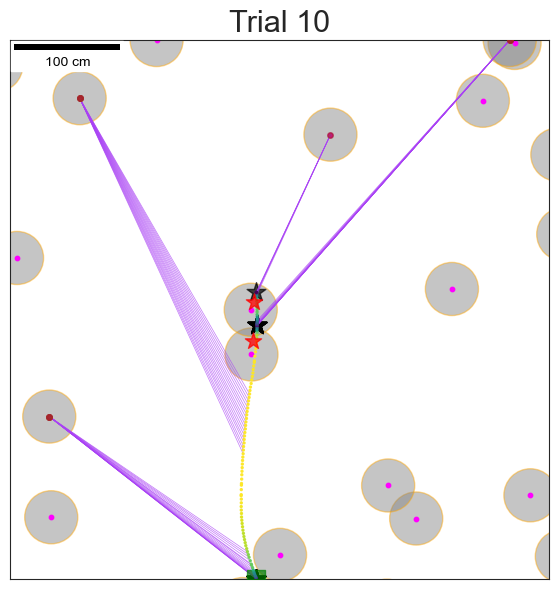

[54.147229, 56.517105]
currentTrial: 11 num_trials: 2


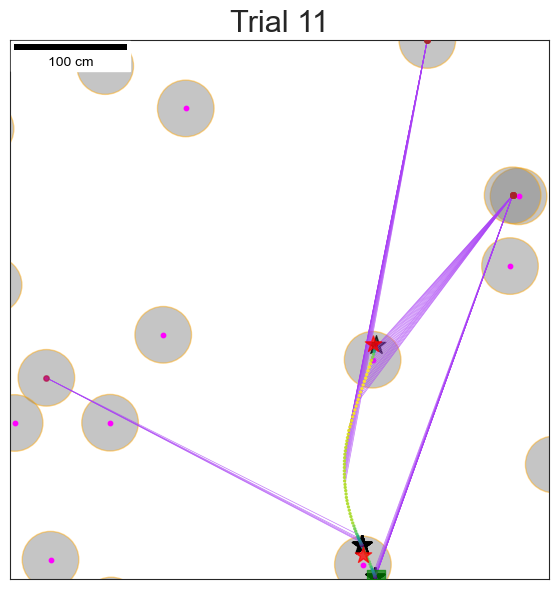

[56.517105, 62.477007]
currentTrial: 13 num_trials: 2


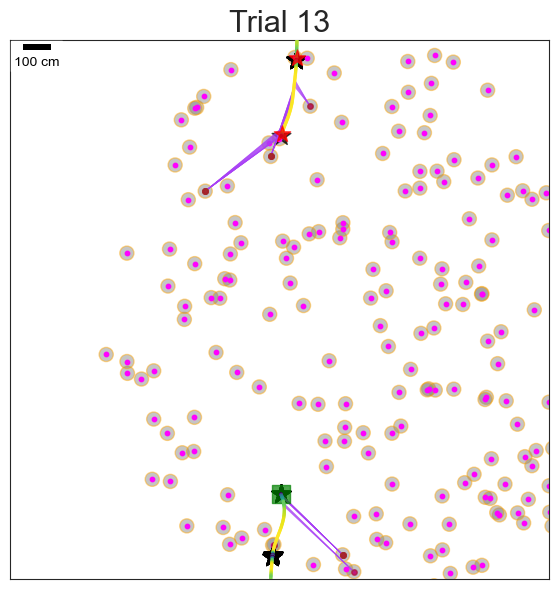

[60.371796, 63.51959]
currentTrial: 14 num_trials: 2


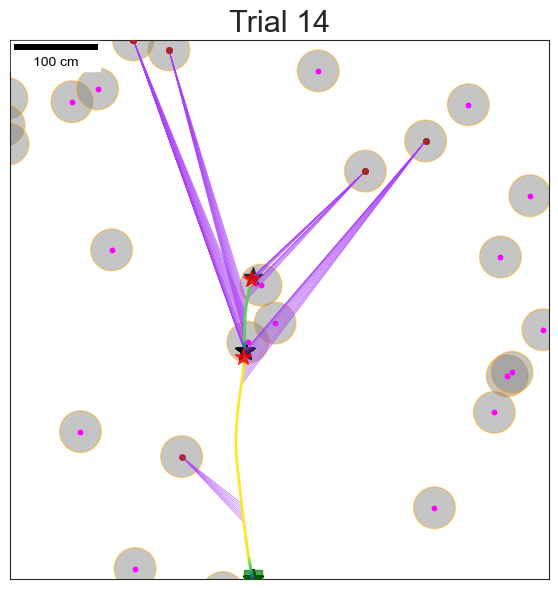

[63.51959, 76.125195]
currentTrial: 16 num_trials: 2


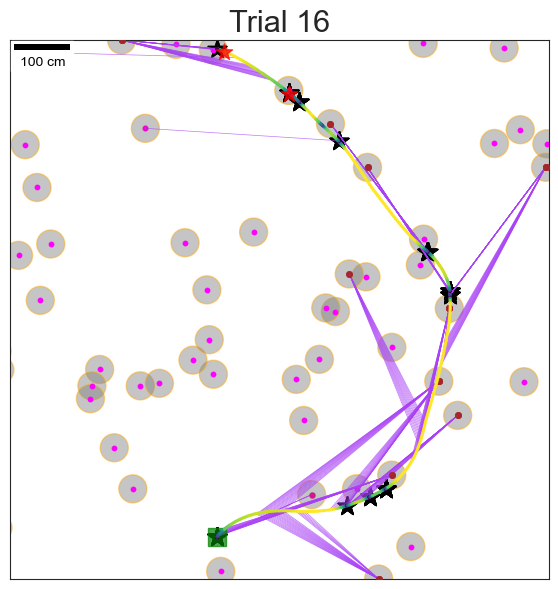

[74.771005, 77.51662]
currentTrial: 17 num_trials: 2


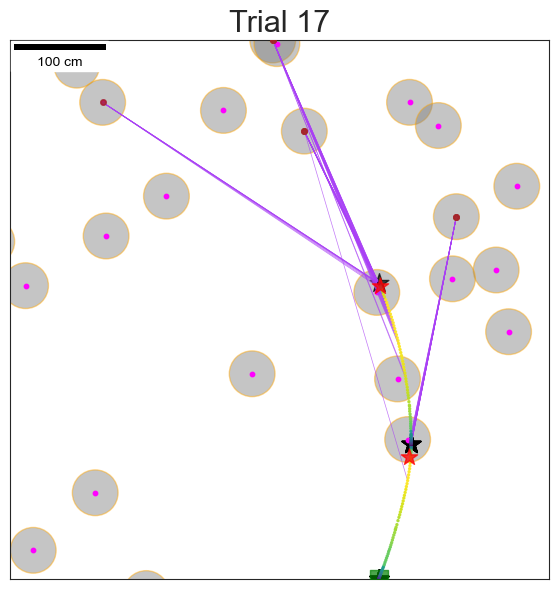

[76.125195, 79.641389]
currentTrial: 18 num_trials: 2


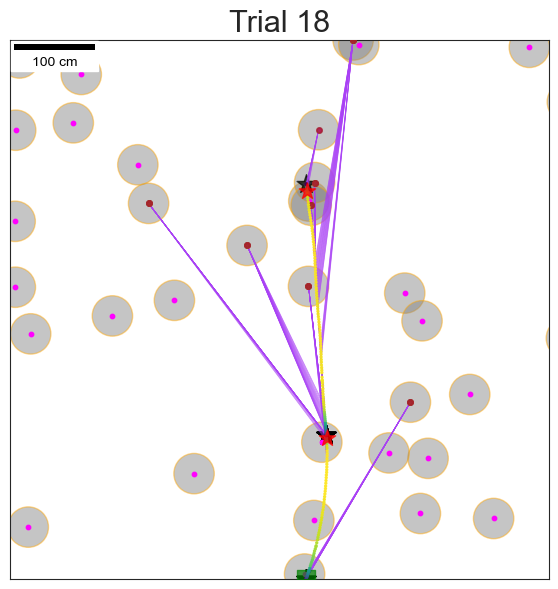

[79.641389, 81.994739]
currentTrial: 22 num_trials: 2


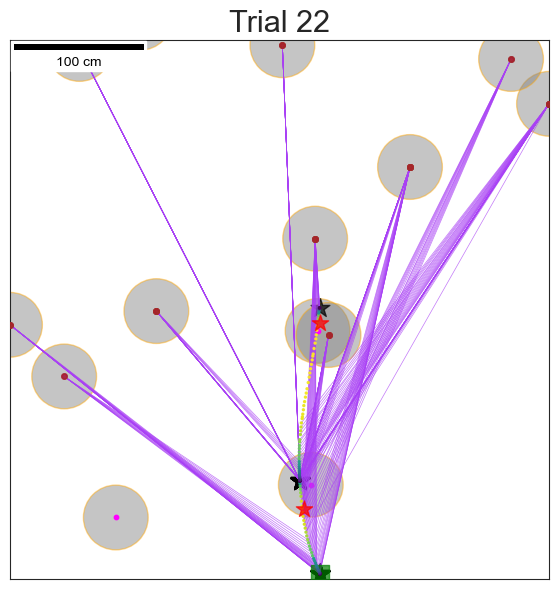

In [ ]:
category = two_in_a_row_trials_by_stops
trial_total_num = 10
PlotTrials_kwargs = {'player': 'monkey',
                     'images_dir': None} 

classic_plot_kwargs = {'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True}

#category = two_in_a_row_simuly
#category = two_in_a_row_non_simul
#category = used_cluster  --> two_in_a_row_non_simul ^ on_before_last_one

num_trials = 2 

if len(category) > 0:
  with basic_func.initiate_plot(7,7,100):
    for currentTrial in category[:trial_total_num]:
        duration = [data_item.ff_caught_T_new[currentTrial-num_trials], data_item.ff_caught_T_new[currentTrial]]
        print(duration)
        plot_trials.PlotTrials(duration, 
                   *PlotTrials_args,
                   **classic_plot_kwargs,
                   currentTrial = currentTrial,
                   num_trials = num_trials, 
                   trail_color_var = 'speed',                  
                   show_connect_path_ff_except_targets = True,
                   show_path_when_target_visible = False,
                   )
        plt.show()  
        

# See Schro data

In [ ]:
# trial_total_num = 10
# data_item.cluster_around_target_trials, _, data_item.cluster_around_target_indices, data_item.cluster_around_target_positions = pattern_by_trials.cluster_around_target_func(data_item.ff_dataframe, 
#         data_item.caught_ff_num, data_item.ff_caught_T_new, data_item.ff_real_position_sorted)

classic_plot_kwargs = {'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True}
data_item.PlotTrials_args = (data_item.monkey_information, data_item.ff_dataframe, data_item.ff_life_sorted, data_item.ff_real_position_sorted, data_item.ff_believed_position_sorted, data_item.cluster_around_target_indices, data_item.ff_caught_T_new)

currentTrial: 819 num_trials: 1


<Figure size 1000x1000 with 0 Axes>

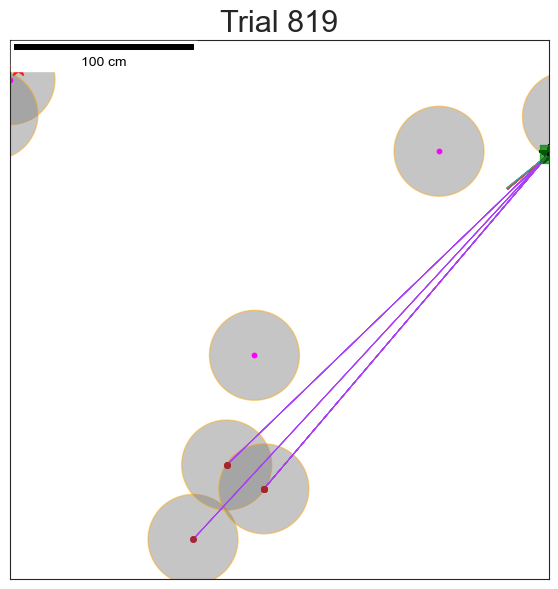

currentTrial: 822 num_trials: 1


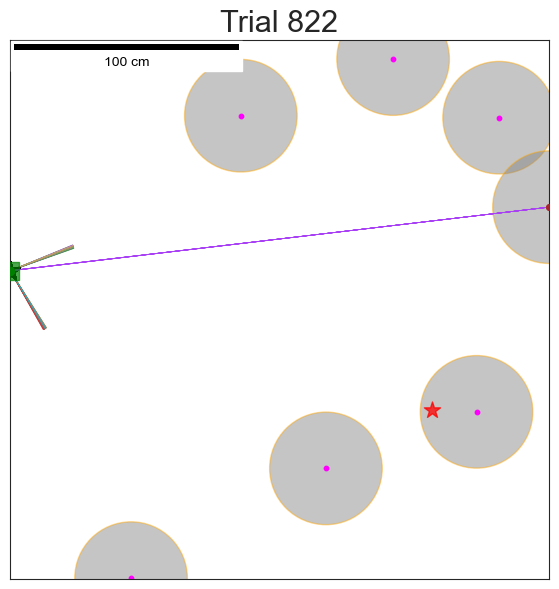

currentTrial: 828 num_trials: 1


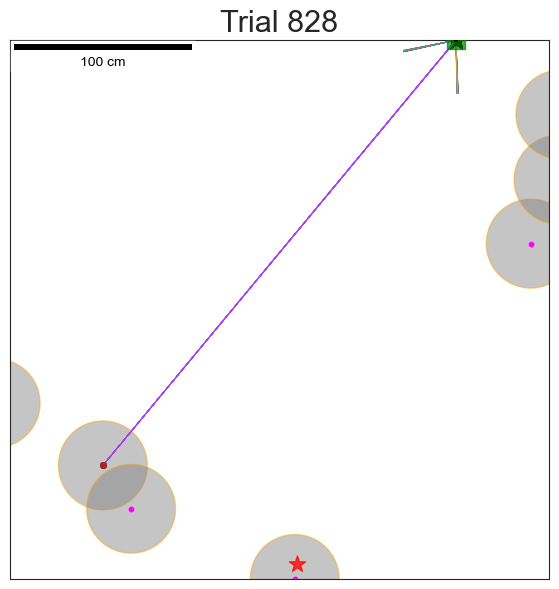

currentTrial: 862 num_trials: 1


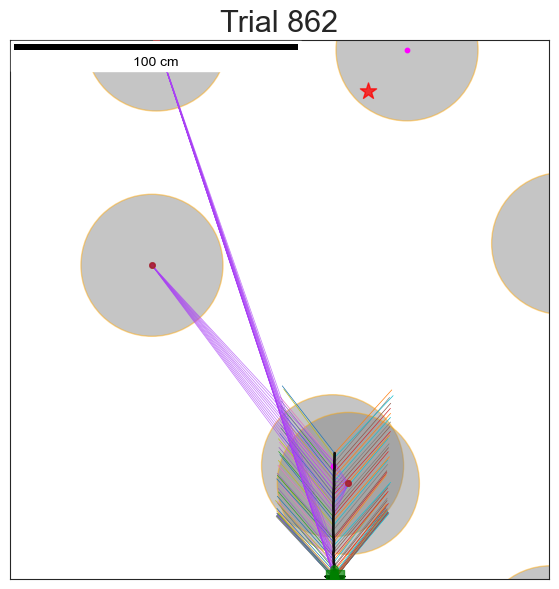

currentTrial: 898 num_trials: 1


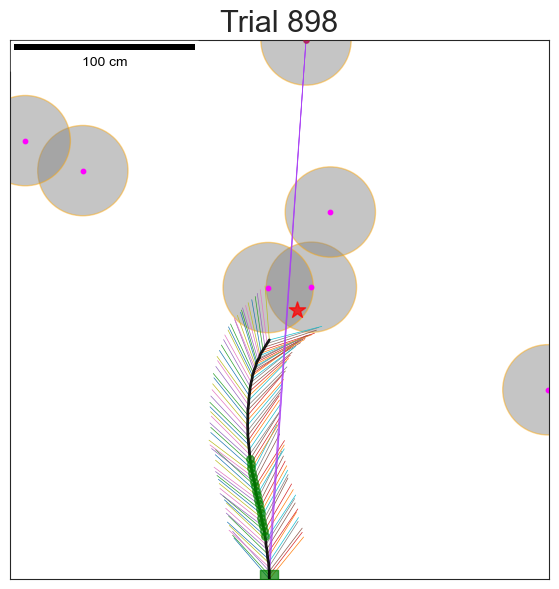

currentTrial: 925 num_trials: 1


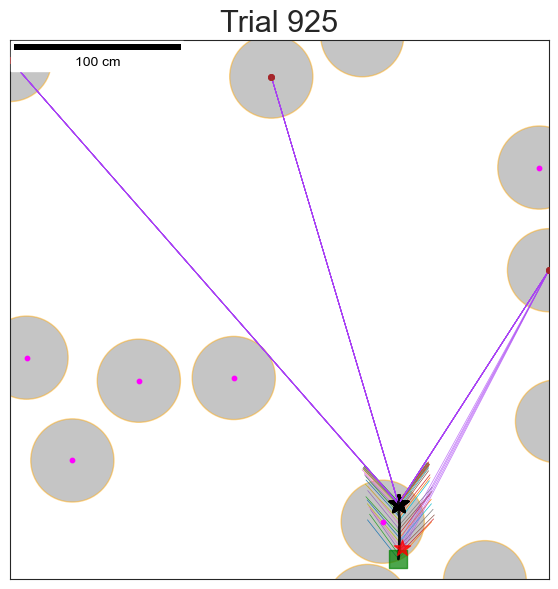

currentTrial: 952 num_trials: 1
currentTrial: 952 num_trials: 1
currentTrial: 952 num_trials: 1
currentTrial: 952 num_trials: 1


In [ ]:

num_trials = 2 


with basic_func.initiate_plot(10,10,100):
  for start_time in range(3000, 4000, 100):
      
      plot_trials.PlotTrials([start_time, start_time+1], 
                  *data_item.PlotTrials_args,
                  **classic_plot_kwargs,
                  currentTrial = None,
                  num_trials = None,                   
                  show_connect_path_ff_except_targets = True,
                  show_path_when_target_visible = True,
                  show_ff_indices = False,
                  hitting_arena_edge_ok = True,
                  visible_distance = 400,
                  minimal_margin = 300,
                  show_monkey_angles = True
                  )
      plt.show()  

      

# Old vs. new distance array

In [ ]:
ff_caught_T_new = data_item.ff_caught_T_new
monkey_information = data_item.monkey_information
ff_life_sorted = data_item.ff_life_sorted
ff_real_position_sorted = data_item.ff_real_position_sorted
ff_believed_position_sorted = data_item.ff_believed_position_sorted


In [ ]:
import numpy.linalg as LA

def old_find_stops_func(currentTrial, ff_caught_T_new, monkey_information, player = "monkey", return_index = False, 
                  since_target_last_seen = False, t_last_vis = None):

    if since_target_last_seen is True:
      duration = [ff_caught_T_new[currentTrial]-t_last_vis[currentTrial-1], ff_caught_T_new[currentTrial]]
    else:
      duration = [ff_caught_T_new[currentTrial-1], ff_caught_T_new[currentTrial]]
    
    cum_iloc_indices = np.where((monkey_information['monkey_t'] > duration[0]) & (monkey_information['monkey_t'] <= duration[1]))[0]
    if len(cum_iloc_indices) > 5:
      cum_mx, cum_my = np.array(monkey_information['monkey_x'].iloc[cum_iloc_indices]), np.array(monkey_information['monkey_y'].iloc[cum_iloc_indices])
      cum_speeddummy = np.array(monkey_information['monkey_speeddummy'].iloc[cum_iloc_indices])
      # if the monkey has stopped at any point
      zerospeed_index = np.where(cum_speeddummy==0)[0]
      if len(zerospeed_index) > 0 :
        zerospeedx, zerospeedy = cum_mx[zerospeed_index], cum_my[zerospeed_index]
        zerospeedindex = cum_iloc_indices[zerospeed_index]
        # Get pairs of x, y coordinates of all the stops
        stop0 = np.array(list(zip(zerospeedx, zerospeedy)))
        # Get the locations indexes of unique stops
        _, stops_index = np.unique(stop0, axis=0, return_index=True)
        stops = stop0[stops_index[np.argsort(stops_index)]]
        stop_indices = zerospeedindex[stops_index[np.argsort(stops_index)]]
        # If player is monkey;
        if player == "monkey":
        # Find distinct stops from unique stops: two stops are considered distinct here if they are at least 5 cm apart; 
        # this number is an arbitrary but sensible choice.
          if return_index is True:
            distinct_stops = [stop_indices[0]] + [stop_indices[i+1] for i in range(len(stops)-1) if LA.norm(np.array((stops[i+1][0]-stops[i][0], stops[i+1][1]-stops[i][1]))) > 10]
          else:
            distinct_stops = [stops[0]] + [stops[i+1] for i in range(len(stops)-1) if LA.norm(np.array((stops[i+1][0]-stops[i][0], stops[i+1][1]-stops[i][1]))) > 10]
        else: # else the player is agent
          if return_index is True:
            distinct_stops = zerospeedindex[stops_index[np.argsort(stops_index)]]
          else:
            distinct_stops = stops
      else:
        # if there is no stop, then return an empty list
        distinct_stops = []
    else:
      # if there is no step in the current trial (this can happen if the monkey captures two fireflies together), then return an empty list
      distinct_stops = []
    return distinct_stops



In [ ]:
cum_distance_array = []
distance_array = []
num_stops_array = []
for i in range(len(ff_caught_T_new)-1):
  cum_distance_array.append(basic_func.get_cum_distance_traveled(i, ff_caught_T_new, monkey_information))
  distance_array.append(basic_func.get_distance_between_two_points(i, ff_caught_T_new, monkey_information, ff_believed_position_sorted))
  num_stops_array.append(len(old_find_stops_func(i, ff_caught_T_new, monkey_information)))
cum_distance_array = np.array(cum_distance_array)
distance_array = np.array(distance_array)
num_stops_array = np.array(num_stops_array)

old_cum_distance_array = cum_distance_array.copy()
old_distance_array = distance_array.copy()
old_num_stops_array = num_stops_array.copy()

In [ ]:
# also get the new cum_distance_array, distance_array, and num_stops_array
cum_distance_array = []
distance_array = []
for i in range(len(data_item.ff_caught_T_new)-1):
  cum_distance_array.append(basic_func.get_cum_distance_traveled(i, data_item.ff_caught_T_new, data_item.monkey_information))
  distance_array.append(basic_func.get_distance_between_two_points(i, data_item.ff_caught_T_new, data_item.monkey_information, data_item.ff_believed_position_sorted))
cum_distance_array = np.array(cum_distance_array)
distance_array = np.array(distance_array)

num_stops_array = organize_patterns_and_features.get_num_stops_array(data_item.monkey_information, np.arange(len(data_item.ff_caught_T_new)))
num_stops_array = num_stops_array[:len(cum_distance_array)]

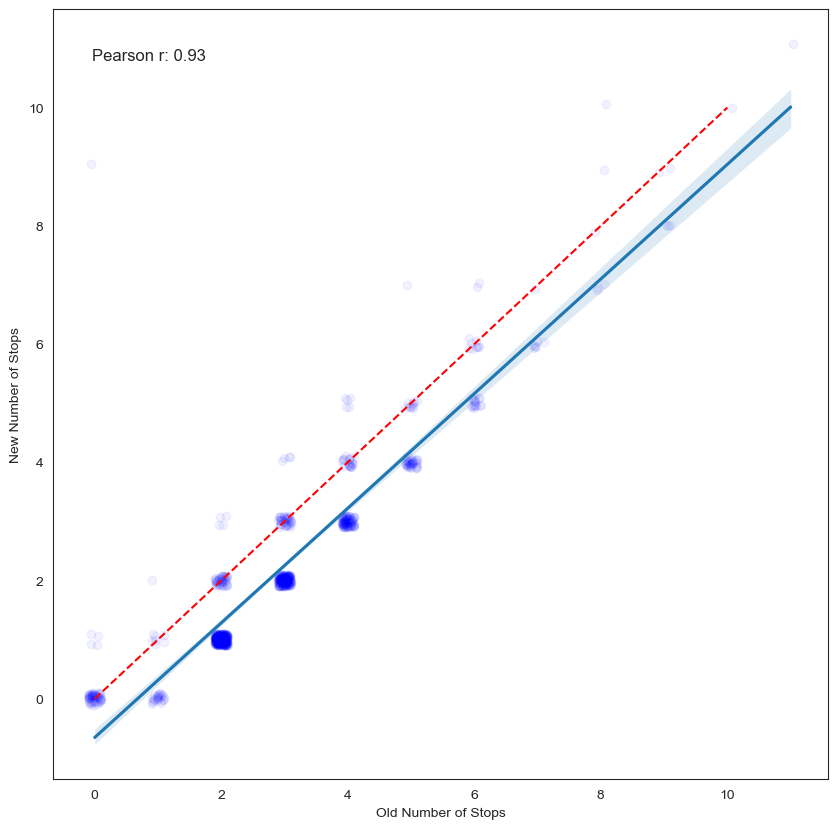

In [ ]:
from scipy.stats import pearsonr
sns.regplot(x=old_num_stops_array, y=num_stops_array, scatter_kws={'color': 'blue', 'alpha': 0.05},
            x_jitter=0.1, y_jitter=0.1)
r, _ = pearsonr(old_num_stops_array, num_stops_array)
# Annotate the plot with the Pearson correlation coefficient
plt.annotate(f'Pearson r: {r:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')


# plot a line of y=x
plt.plot([0, 10], [0, 10], color='red', linestyle='--')
plt.xlabel('Old Number of Stops')
plt.ylabel('New Number of Stops')
plt.show()

# Change stop criterion?

In [ ]:
data_item = further_processing_class.FurtherProcessing(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
# data_item.find_patterns()
# data_item.make_PlotTrials_args()

Retrieved monkey data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/monkey_information.csv  and ff data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/ff_dataframe.h5


In [ ]:
data_item.find_patterns()

When take out monkey subset for GUAT, 412 clusters out of 549 are too close to the target or the last target. Those clusters are filtered out.
The number of new trials that are used to separate stop clusters is 953


In [ ]:
ff_caught_T_new = data_item.ff_caught_T_new
monkey_information = data_item.monkey_information
ff_life_sorted = data_item.ff_life_sorted
ff_real_position_sorted = data_item.ff_real_position_sorted
ff_believed_position_sorted = data_item.ff_believed_position_sorted

In [ ]:
monkey_information['monkey_speed'].max()

200.0

In [ ]:
monkey_information['monkey_dw'].max()

1.5731023009150584

In [ ]:
closest_stop_to_capture_df = alt_ff_utils.get_closest_stop_time_to_all_capture_time(ff_caught_T_new, monkey_information, ff_real_position_sorted, stop_ff_index_array=np.arange(len(ff_caught_T_new)))
ff_dataframe_visible = data_item.ff_dataframe[data_item.ff_dataframe['visible'] == 1]
closest_stop_to_capture_df = monkey_landing_in_ff.add_distance_from_ff_to_stop(closest_stop_to_capture_df, monkey_information, ff_real_position_sorted)
original_length = len(closest_stop_to_capture_df)
outlier_sub_df = closest_stop_to_capture_df[closest_stop_to_capture_df['distance_from_ff_to_stop'] > 25].sort_values(by='distance_from_ff_to_stop', ascending=False)
closest_stop_to_capture_df = closest_stop_to_capture_df[closest_stop_to_capture_df['distance_from_ff_to_stop'] <= 25].copy()

print(f'{original_length - len(closest_stop_to_capture_df)} rows out of {original_length} rows were removed from closest_stop_to_capture_df because the distance between stop and ff center is larger than 25cm, ' +
        f'\n which is {round((original_length - len(closest_stop_to_capture_df))/original_length*100, 2)}% of the rows, ' + 
        f'and the sorted distances from those are {outlier_sub_df["distance_from_ff_to_stop"].values}')


61 rows out of 953 rows were removed from closest_stop_to_capture_df because the distance between stop and ff center is larger than 25cm, 
 which is 6.4% of the rows, and the sorted distances from those are [802.31739941 614.76153246 513.18910618 445.95343978 414.64106108
 189.62842519 122.21112227  74.04968925  41.22372358  40.19808499
  39.54808788  38.80115662  37.61171564  35.61437552  34.48571715
  34.3504722   34.2894841   34.06738361  33.85914003  33.64709154
  33.46457194  33.46442714  33.08540303  32.45649819  30.96024576
  30.53881836  30.4477919   30.38240491  29.84621105  29.26043342
  29.24950357  28.74889325  28.46726625  28.23970138  28.1866198
  28.08317402  28.00019998  27.88098264  27.65708821  27.32693121
  27.2956792   27.21541058  27.08278078  26.87290155  26.84637383
  26.53935947  26.48652794  26.31052631  26.21366067  26.02652916
  25.96909618  25.96845643  25.79880881  25.75648057  25.73013381
  25.61727499  25.60923376  25.49382905  25.45351149  25.22542555
  

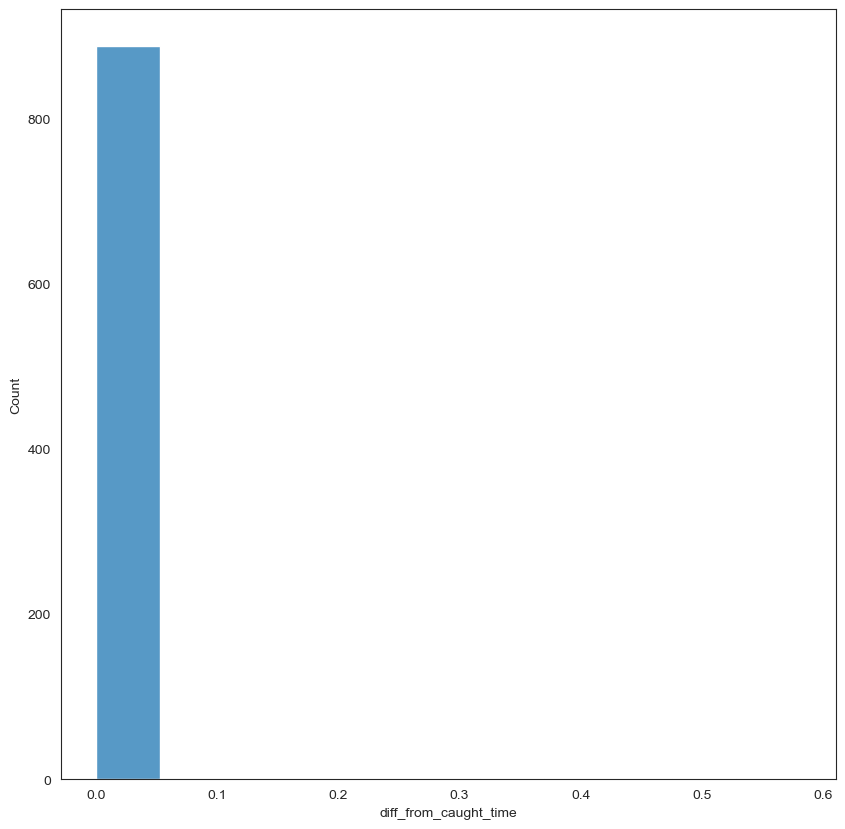

In [ ]:
sns.histplot(closest_stop_to_capture_df['diff_from_caught_time'])
plt.show()

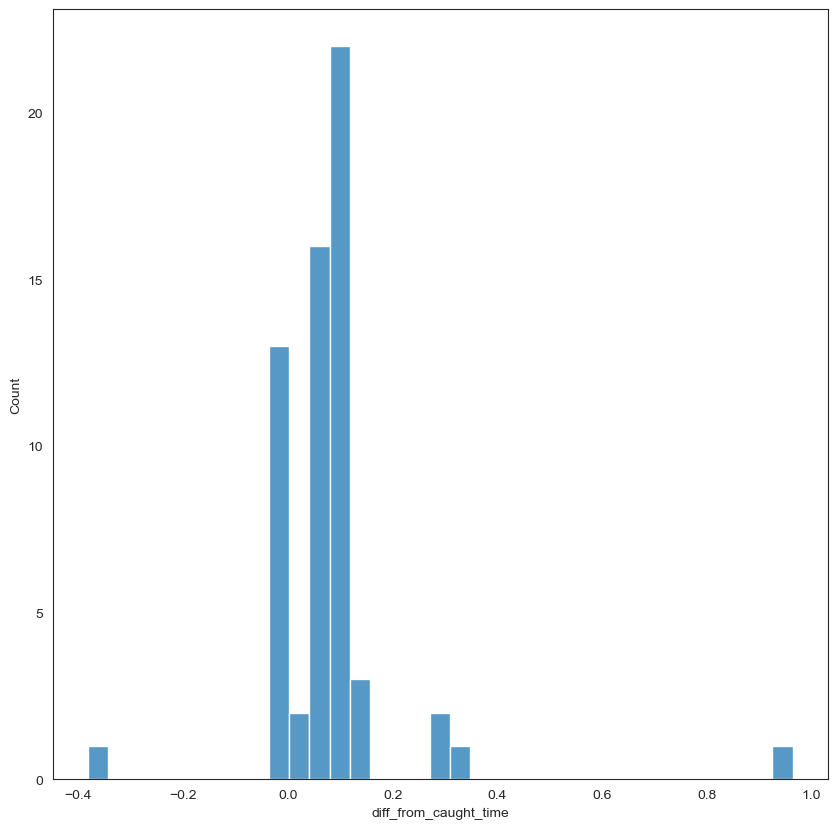

In [ ]:
sns.histplot(outlier_sub_df['diff_from_caught_time'])
plt.show()

In [ ]:
def get_monkey_speed_and_dw_in_target(row, monkey_information):
    monkey_sub = monkey_information[monkey_information['time'].between(row['caught_time']-0.2, row['caught_time']+0.2)].copy()
    monkey_sub['distance_to_ff'] = np.sqrt((monkey_sub['monkey_x'] - row['ff_x'])**2 + (monkey_sub['monkey_y'] - row['ff_y'])**2)
    monkey_sub = monkey_sub[monkey_sub['distance_to_ff'] < 25]
    return monkey_sub

In [ ]:
def plot_min_speed_and_abs_dw(all_min_speed, all_min_abs_dw):
    all_min_speed = np.array(all_min_speed)
    all_min_abs_dw = np.array(all_min_abs_dw)

    # plot min speed
    sns.histplot(all_min_speed, bins=100)
    plt.axvline(0.1, color='red', linestyle='--')
    plt.title('Minimum Speed')
    plt.show()
    # plot again, but limit the x axis
    sns.histplot(all_min_speed, bins=100, binrange=(0, 10))
    plt.axvline(0.1, color='red', linestyle='--')
    plt.title('Minimum Speed, limited x axis')
    plt.show()

    # plot min abs dw
    sns.histplot(all_min_abs_dw, bins=100)
    plt.axvline(0.0035, color='red', linestyle='--')
    plt.title('Min Abs Dw')
    plt.show()
    # plot again, but limit the x axis
    sns.histplot(all_min_abs_dw, bins=100, binrange=(0, 0.2))
    plt.axvline(0.0035, color='red', linestyle='--')
    plt.title('Min Abs Dw, limited x axis')
    plt.show()


In [ ]:
outlier_sub_df[['ff_x', 'ff_y']] = ff_real_position_sorted[outlier_sub_df['stop_ff_index'].values]
monkey_information['abs_monkey_dw'] = np.abs(monkey_information['monkey_dw'])

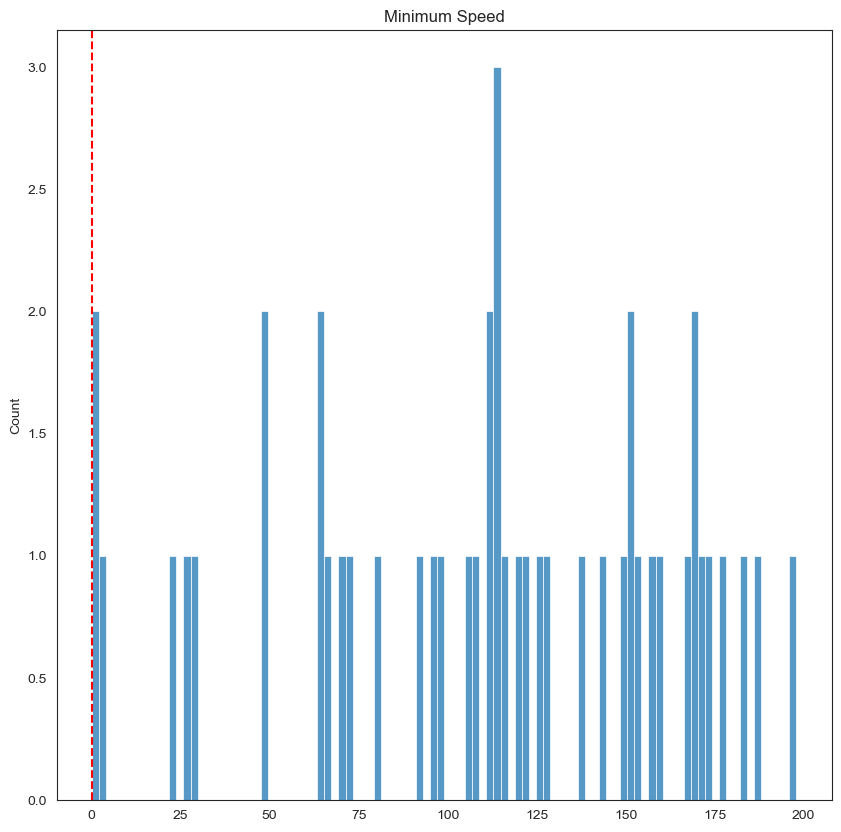

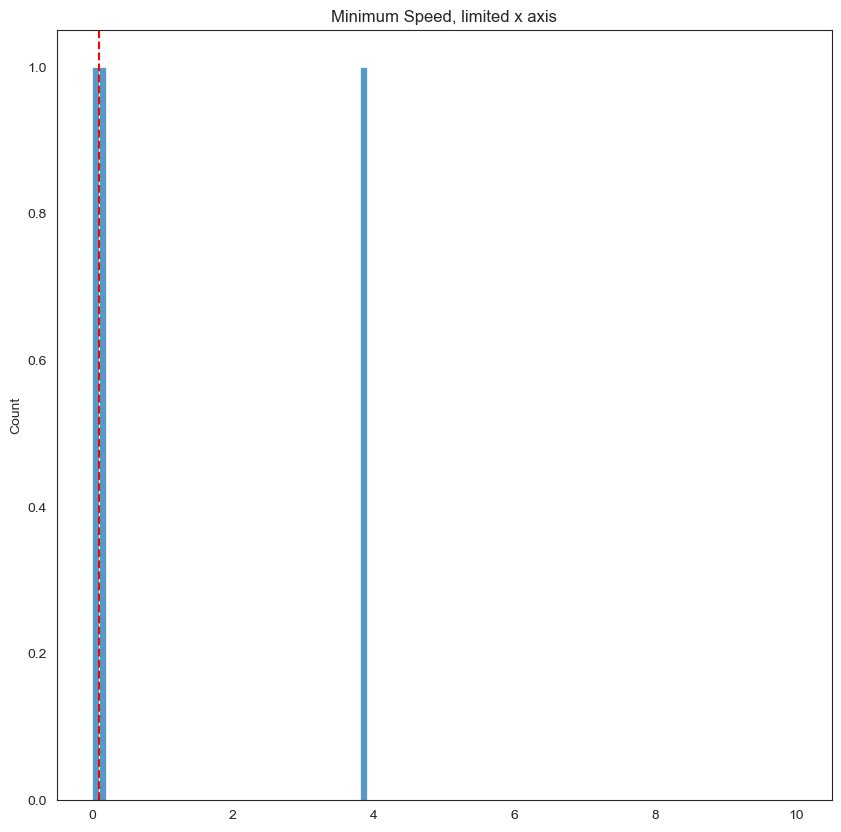

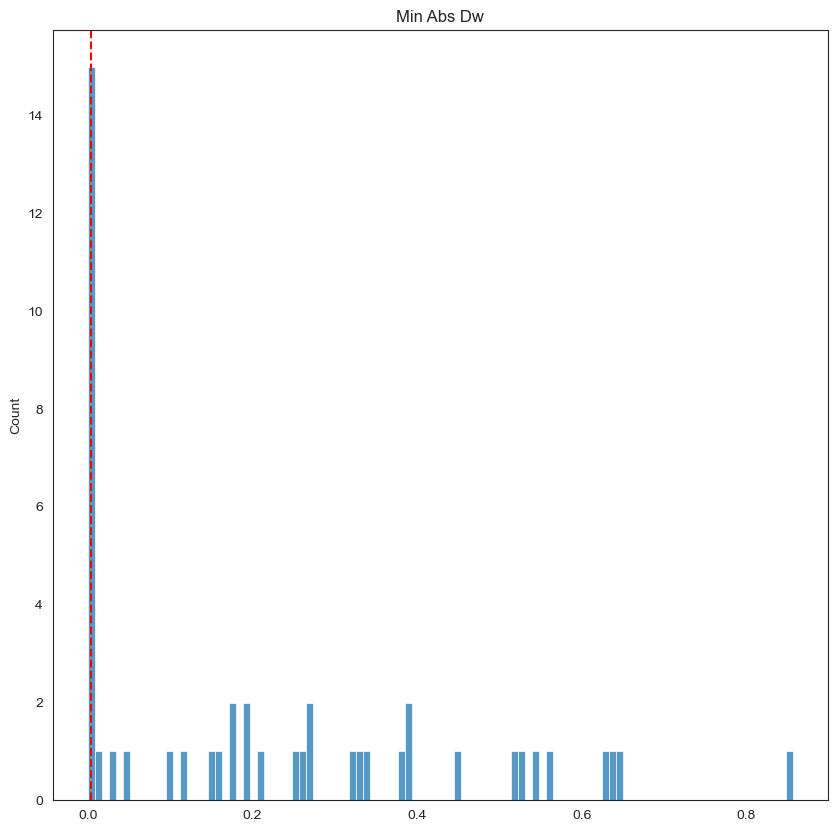

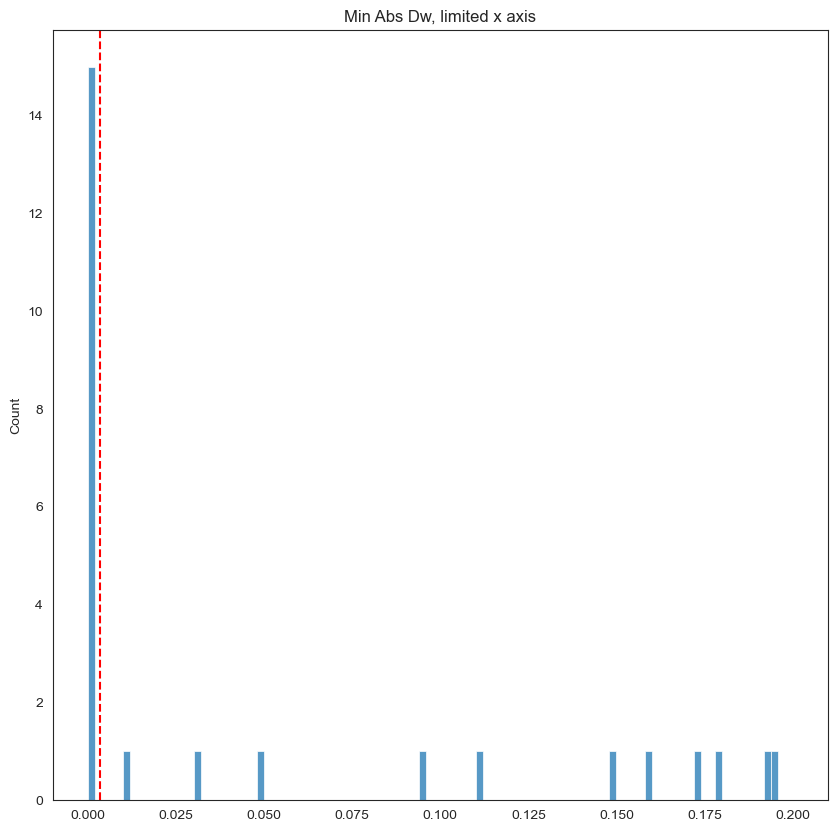

In [ ]:
# Plot the min speed and min abs dw
all_min_speed = []
all_min_abs_dw = []
for index, row in outlier_sub_df.iterrows():
    monkey_sub = get_monkey_speed_and_dw_in_target(row, monkey_information)
    min_speed = monkey_sub['monkey_speed'].min()
    min_dw = monkey_sub['abs_monkey_dw'].min()
    all_min_speed.append(min_speed)
    all_min_abs_dw.append(min_dw)

plot_min_speed_and_abs_dw(all_min_speed, all_min_abs_dw)


No monkey data found for 51472
No monkey data found for 51472
No monkey data found for 8339
No monkey data found for 195543
No monkey data found for 134482
No monkey data found for 195543
No monkey data found for 136133
No monkey data found for 213779
No monkey data found for 106867
No monkey data found for 48618
No monkey data found for 26433
No monkey data found for 106937
No monkey data found for 210378
No monkey data found for 22383
No monkey data found for 136301


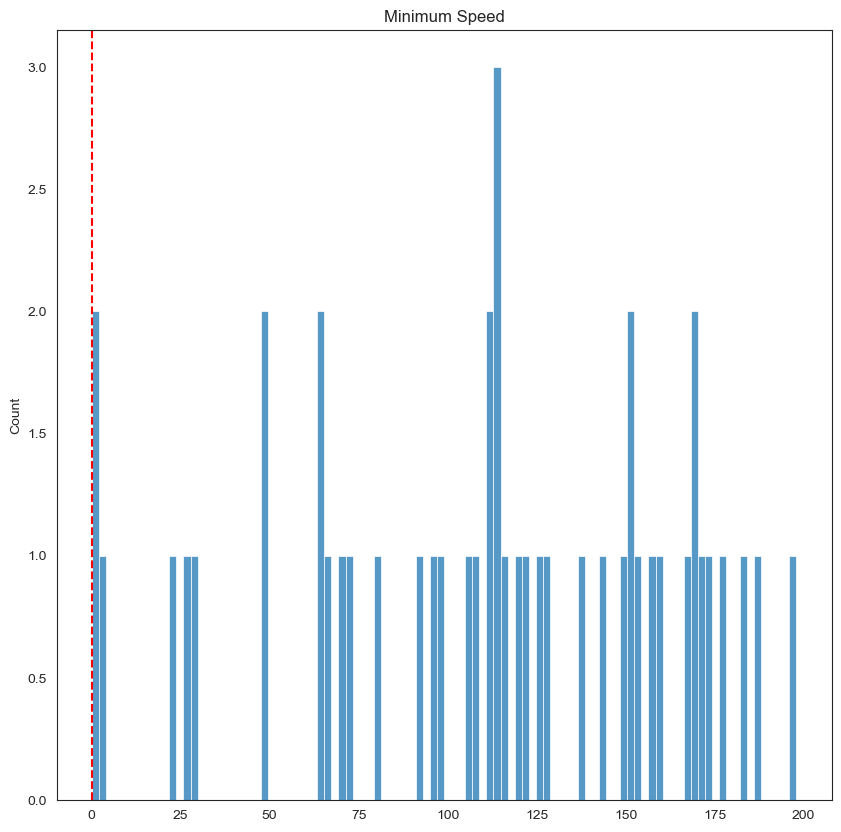

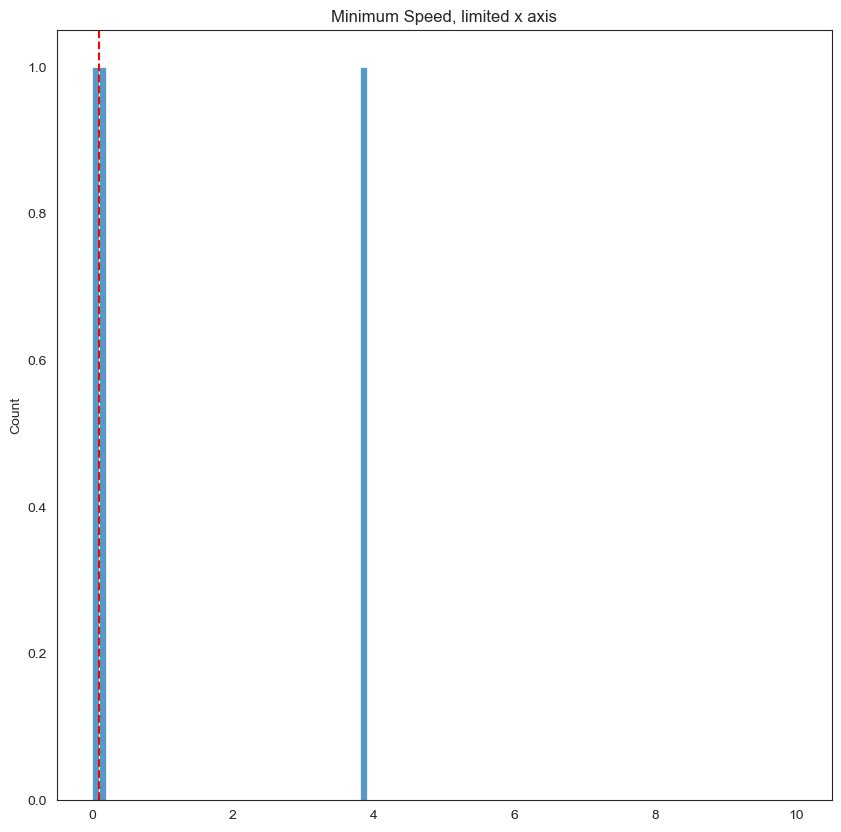

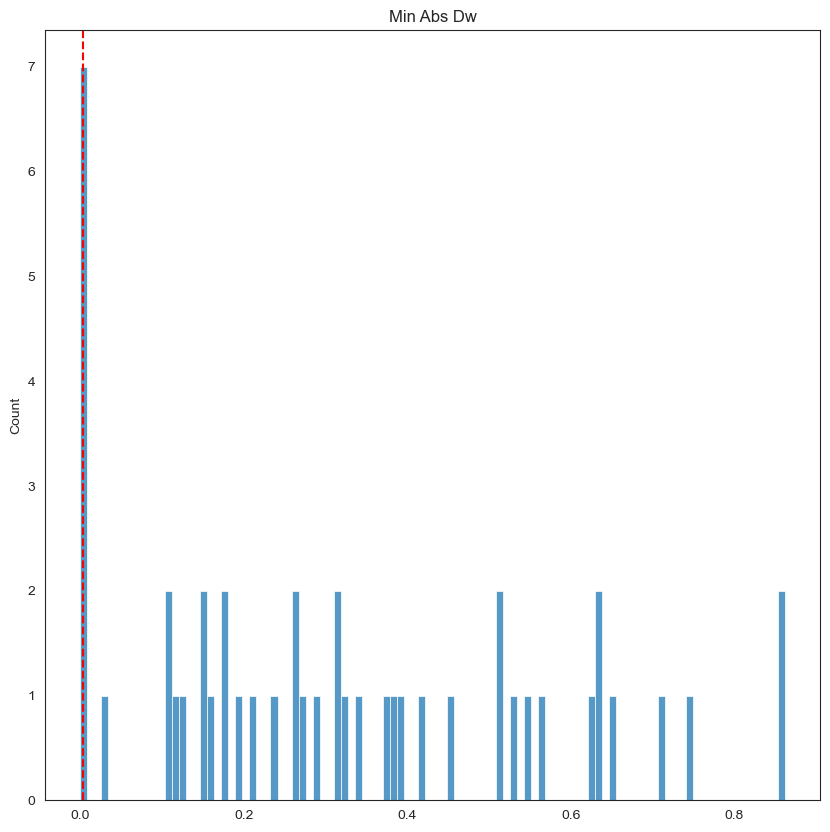

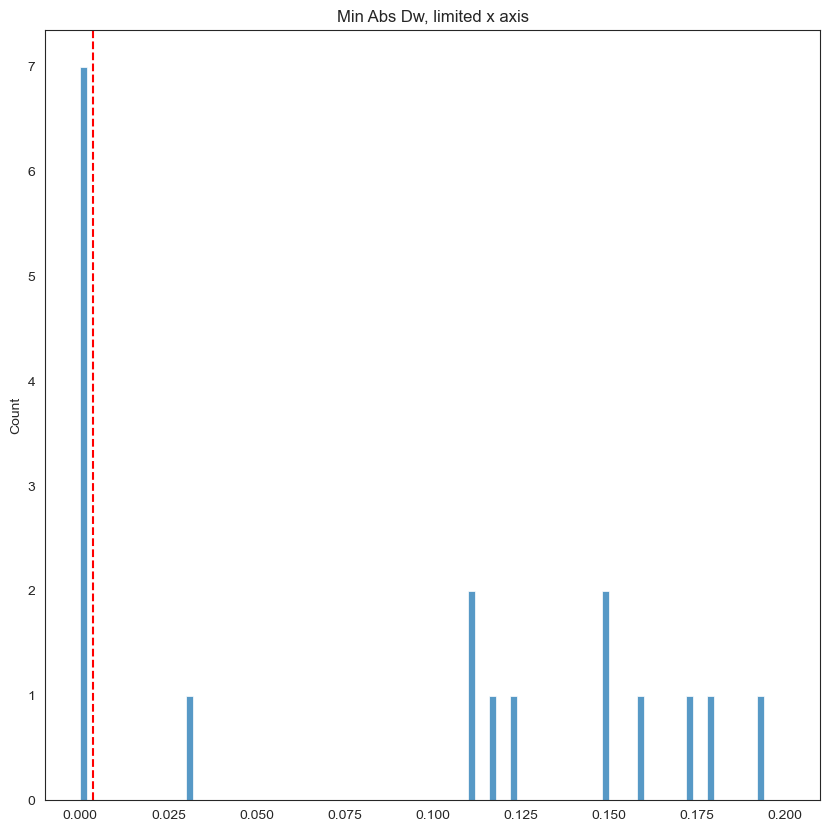

In [ ]:
# but i guess we would also want to know min speed and the *corresponding* min dw, and vice versa
all_min_speed = []
corr_dw = []
for index, row in outlier_sub_df.iterrows():
    monkey_sub = get_monkey_speed_and_dw_in_target(row, monkey_information)
    if len(monkey_sub) == 0:
        print(f'No monkey data found for {index}')
        continue
    min_speed = monkey_sub['monkey_speed'].min()
    all_min_speed.append(min_speed)
    corr_dw.append(monkey_sub[monkey_sub['monkey_speed'] == min_speed]['abs_monkey_dw'].values[0])
plot_min_speed_and_abs_dw(all_min_speed, corr_dw)

No monkey data found for 51472
No monkey data found for 51472
No monkey data found for 8339
No monkey data found for 195543
No monkey data found for 134482
No monkey data found for 195543
No monkey data found for 136133
No monkey data found for 213779
No monkey data found for 106867
No monkey data found for 48618
No monkey data found for 26433
No monkey data found for 106937
No monkey data found for 210378
No monkey data found for 22383
No monkey data found for 136301


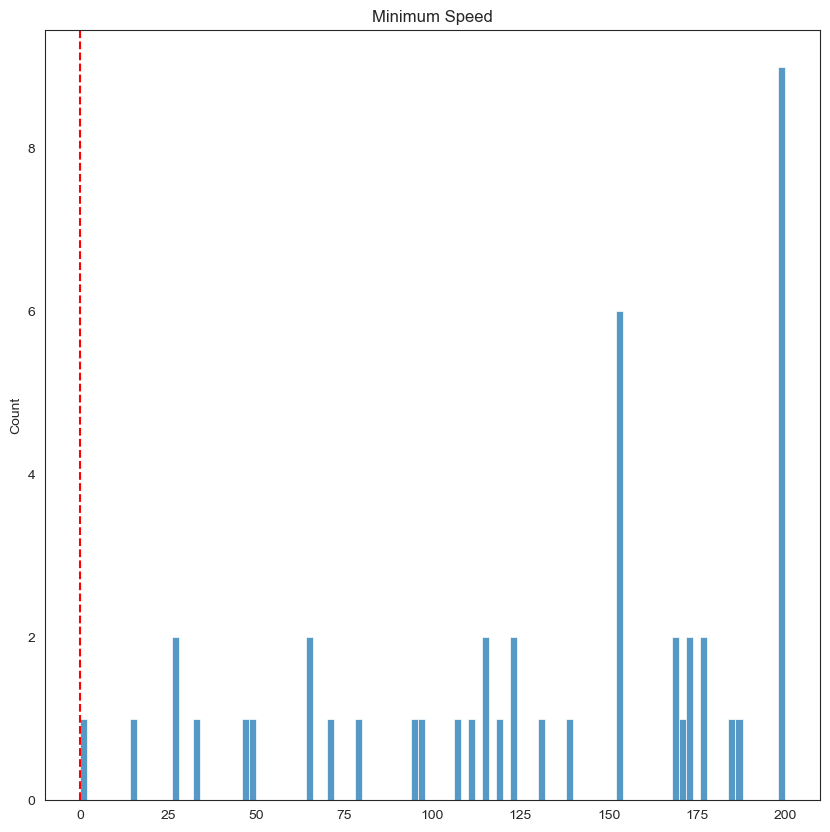

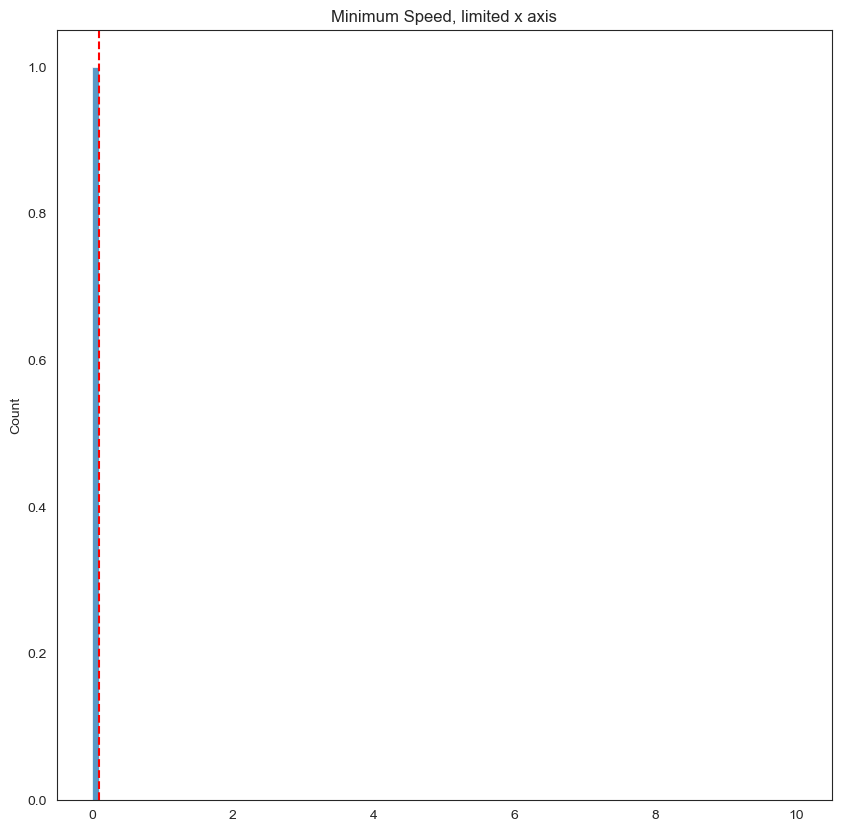

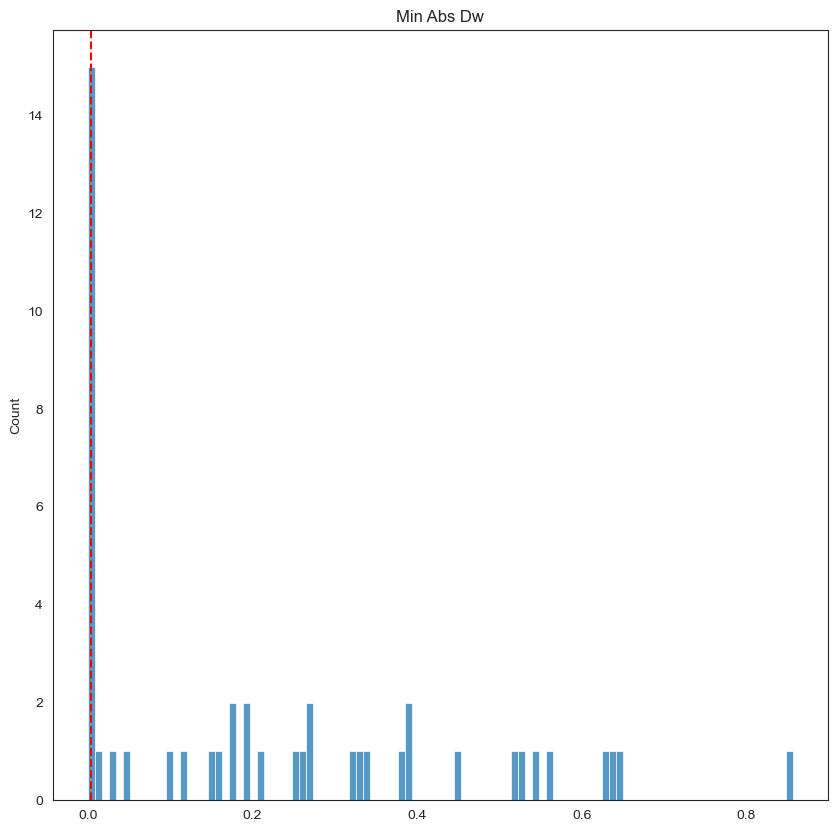

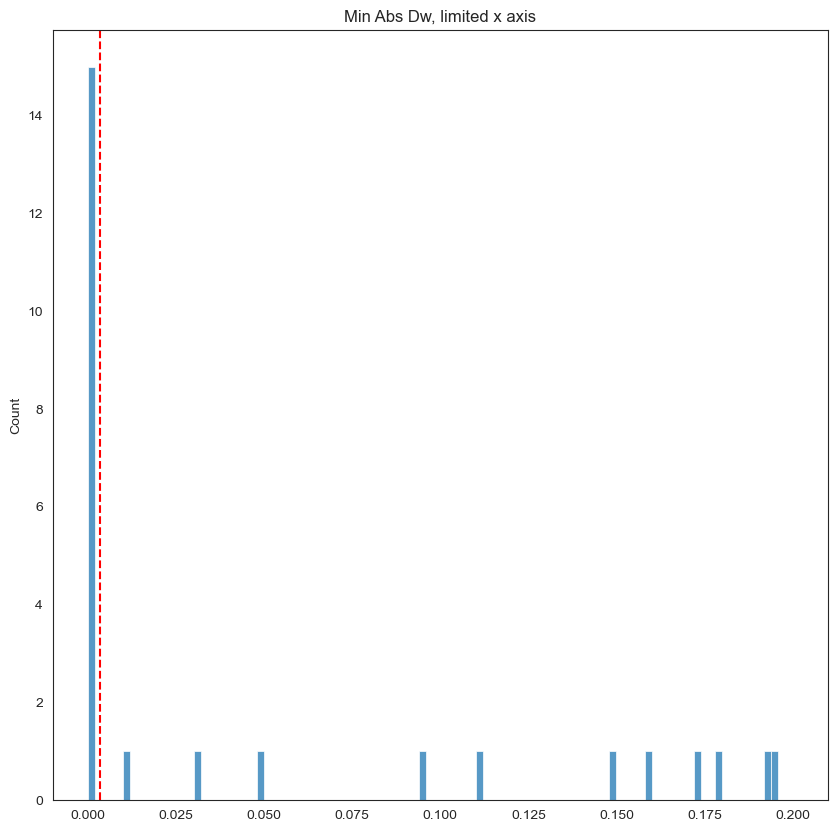

In [ ]:
# Lastly, we can also find the min abs dw and the corresponding speed
all_min_abs_dw = []
corr_speed = []
for index, row in outlier_sub_df.iterrows():
    monkey_sub = get_monkey_speed_and_dw_in_target(row, monkey_information)
    if len(monkey_sub) == 0:
        print(f'No monkey data found for {index}')
        continue
    min_dw = monkey_sub['abs_monkey_dw'].min()
    all_min_abs_dw.append(min_dw)
    corr_speed.append(monkey_sub[monkey_sub['abs_monkey_dw'] == min_dw]['monkey_speed'].values[0])
all_min_abs_dw = np.array(all_min_abs_dw)
corr_speed = np.array(corr_speed)
plot_min_speed_and_abs_dw(corr_speed, all_min_abs_dw)